<a href="https://colab.research.google.com/github/Prospkt/neural_net_stuff/blob/main/classificacao_binaria_diabetes_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
dados = read_csv('/content/diabetes_titulos.csv', sep=",")
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [17]:
X = dados.values[:,0:9]
y = dados.values[:,8]


In [18]:
# Geracao dos arquivos de treino, teste e validacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
# Geracao do modelo 
model = Sequential()
model.add(Dense(100, activation= 'tanh', kernel_initializer= 'he_normal', input_shape=(9,))) #9 colunas-1 =8
model.add(Dense(80, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid')) 

In [23]:
# Compilacao do modelo 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])


In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
50/50 [==============================] - 1s 11ms/step - loss: 0.6318 - accuracy: 0.6416 - val_loss: 0.5726 - val_accuracy: 0.6725
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.6986 - val_loss: 0.5775 - val_accuracy: 0.6850
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.6963 - val_loss: 0.5380 - val_accuracy: 0.7150
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7088 - val_loss: 0.5425 - val_accuracy: 0.7200
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7211 - val_loss: 0.5210 - val_accuracy: 0.7375
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7138 - val_loss: 0.5138 - val_accuracy: 0.7450
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7688 - val_loss: 0.4973 - val_accuracy: 0.7675
Epoch 8/50
50/50 [=

<function matplotlib.pyplot.legend>

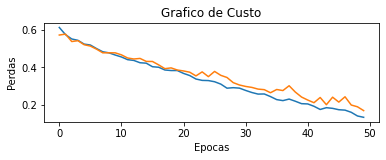

In [25]:
#GRAFICO - plot loss durante treinamenti=o
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'], label= 'Perdas durante os Treinamentos')
plt.plot(history.history['val_loss'], label= 'Perdas durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend

<function matplotlib.pyplot.legend>

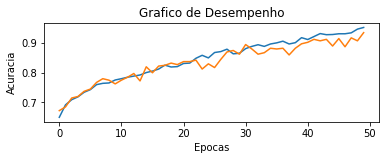

In [26]:
#GRAFICO - plot accuracy durante treinament-
plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'], label= 'Acuracia durante os Testes')
plt.plot(history.history['val_accuracy'], label= 'Acuracia durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend